In [325]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import numpy as np

In [326]:
def open_image(file_name):
        """
        Read image from disk. OpenCV library is used because of better performance over PIL.
        :param file_name: str or PosixPath, path to image
        :return: image
        """
        flags = cv2.IMREAD_UNCHANGED + cv2.IMREAD_ANYDEPTH + cv2.IMREAD_ANYCOLOR

        im = cv2.imread(str(file_name), flags).astype(np.float32) / 255
        return cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

In [327]:
def show_image(image, figure_size=(16, 12), axis=None):
    """
    Display image in matplotlib figure
    :param image: openCV image
    :param figure_size: size of figure
    :param axis:
    :return:
    """
    if not axis:
        figure, axis = plt.subplots(figsize=figure_size)
    axis.imshow(image, aspect='auto')
    return axis

0.98039216
0.7176471
254
4


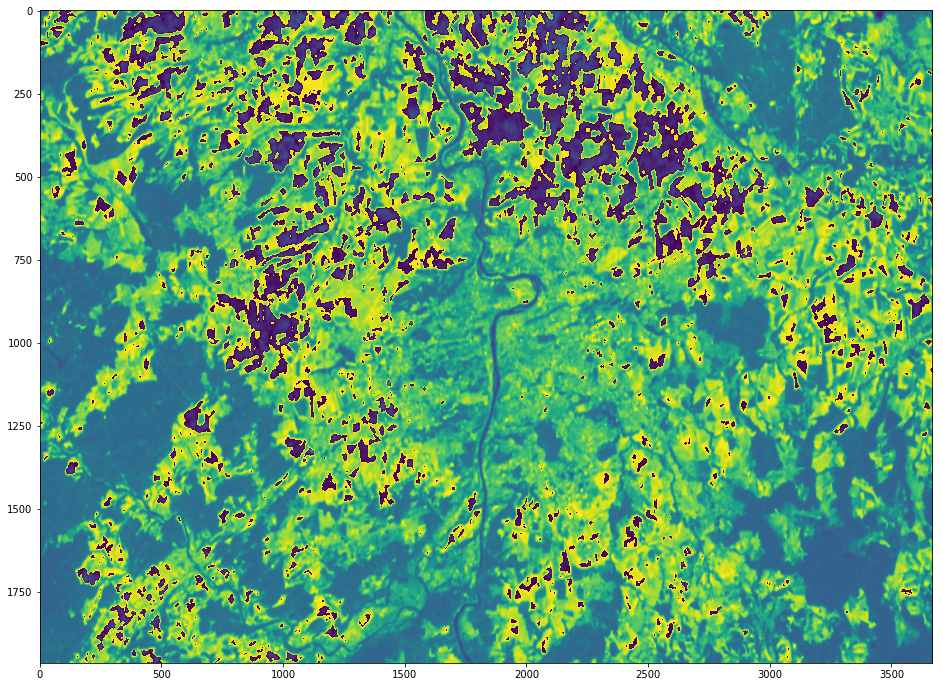

In [332]:
import rasterio
import PIL.Image
from collections import defaultdict
from rasterio.mask import mask

with rasterio.open('/Users/rpitonak/Downloads/input_big.tiff') as red_file:
    #print(red_file.read())
    data = red_file.read()[0]
    data_max = np.max(data)
    data_min = np.min(data)
    print(data_max)
    print(data_min)
    #bit8 = (((data - data_min) * (255 - 0)) / (data_max - data_min)) + 0
    bit8 = ((1-data)* 1383.5106382995).astype('uint8') # convert to 0-256 values
    print(np.max(bit8))
    print(np.min(bit8))
    image = PIL.Image.fromarray(bit8, "L")
    
    
    #new_image = PIL.Image.new("RGBA", image.size)
    #image = image.convert("P", palette=Image.ADAPTIVE, colors=20)
    show_image(image)
    image.save("temp_out.png","PNG")

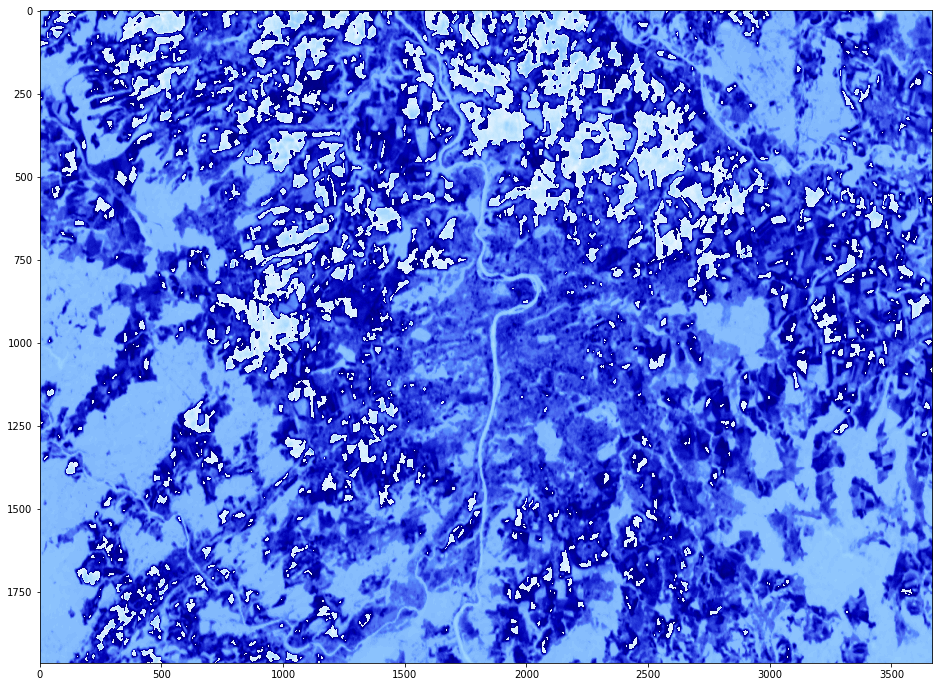

In [333]:
import cmapy
im_gray = cv2.imread("/Users/rpitonak/Documents/workspace/playground/sentinel/temp_out.png", cv2.IMREAD_GRAYSCALE)
im_color = cv2.applyColorMap(im_gray, cmapy.cmap('OrRd'))

cv2.imwrite('color_img.jpg', im_color)

show_image(im_color)

## Filtrer categories

This function will take input geojson as parameter and filter just categories that have one of the values in `catergory_names`

In [415]:
def create_js_from_geojson(input_file, output_file, var_name):
    with open(input_file, 'r+') as f1:
            content = f1.read()
    with open(output_file, 'w+') as f2:
        f2.write("var " + var_name + "= [" + content + "]")

In [416]:
import json

def filter_categories(input_json, output_json, category_names=None):
    with open(input_json, 'r') as json_file:
        data = json.load(json_file)
        if not category_names:
            with open(output_json, 'w') as outfile:
                json.dump(data, outfile)
        else:
            out_data = {"type": "FeatureCollection", "features": []}
            features = data["features"]
            
            for index, obj in enumerate(features):
                properties = obj["properties"]

                for category in category_names:
                    if properties[category] == True:
                        out_data["features"].append(copy.deepcopy(obj))
                        
            with open(output_json, 'w') as outfile:
                print(len(out_data["features"]))
                json.dump(out_data, outfile)


In [406]:
filter_categories('/Users/rpitonak/Downloads/zelenestrechy.geojson', '/Users/rpitonak/Downloads/out_zelenestrechy.geojson', ["Kategorie I", "Kategorie II"])

812


In [403]:
import copy
def bounding_box_subset(input_json, output_json, bounding_box):
    with open(input_json, 'r') as json_file:
        data = json.load(json_file)
        if not bounding_box:
            with open(output_json, 'w') as outfile:
                json.dump(data, outfile)
        else:
            out_data = {"type": "FeatureCollection", "features": []}
            features = data["features"]

            print(features[0]["geometry"]["coordinates"][0][0])
            
            for index, obj in enumerate(features):
                coordinates = obj["geometry"]["coordinates"][0][0]
                
                for item in coordinates:
                    if bounding_box[0] <= item[0] <= bounding_box[2]:
                        if bounding_box[1] >= item[1] >= bounding_box[3]:
                            out_data["features"].append(copy.deepcopy(obj))
            
            with open(output_json, 'w') as outfile:
                print(len(out_data["features"]))
                json.dump(out_data, outfile)

Create first bounding box

In [417]:
bounding_box_subset('/Users/rpitonak/Downloads/zelenestrechy.geojson', '/Users/rpitonak/Downloads/bb1_zelenestrechy.geojson', [14.428063, 50.090759, 14.437146,50.087322])
create_js_from_geojson('/Users/rpitonak/Downloads/bb1_zelenestrechy.geojson', '/Users/rpitonak/Downloads/bb1_zelenestrechy.js', 'geo_bb1')

[[14.382005, 49.959214], [14.382024, 49.959171], [14.382041, 49.959129], [14.382057, 49.959092], [14.381232, 49.958946], [14.381214, 49.958987], [14.381198, 49.959025], [14.381179, 49.959069], [14.381273, 49.959085], [14.381271, 49.95909], [14.381275, 49.959091], [14.381324, 49.959099], [14.381326, 49.959095], [14.381855, 49.959188], [14.381852, 49.959195], [14.381853, 49.959195], [14.381905, 49.959203], [14.381908, 49.959197], [14.382005, 49.959214]]
1129


Create second box

In [418]:
bounding_box_subset('/Users/rpitonak/Downloads/zelenestrechy.geojson', '/Users/rpitonak/Downloads/bb2_zelenestrechy.geojson', [14.424331, 50.086436, 14.432383,50.081072])
create_js_from_geojson('/Users/rpitonak/Downloads/bb2_zelenestrechy.geojson', '/Users/rpitonak/Downloads/bb2_zelenestrechy.js', 'geo_bb2')

[[14.382005, 49.959214], [14.382024, 49.959171], [14.382041, 49.959129], [14.382057, 49.959092], [14.381232, 49.958946], [14.381214, 49.958987], [14.381198, 49.959025], [14.381179, 49.959069], [14.381273, 49.959085], [14.381271, 49.95909], [14.381275, 49.959091], [14.381324, 49.959099], [14.381326, 49.959095], [14.381855, 49.959188], [14.381852, 49.959195], [14.381853, 49.959195], [14.381905, 49.959203], [14.381908, 49.959197], [14.382005, 49.959214]]
1757
